In [1]:
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt


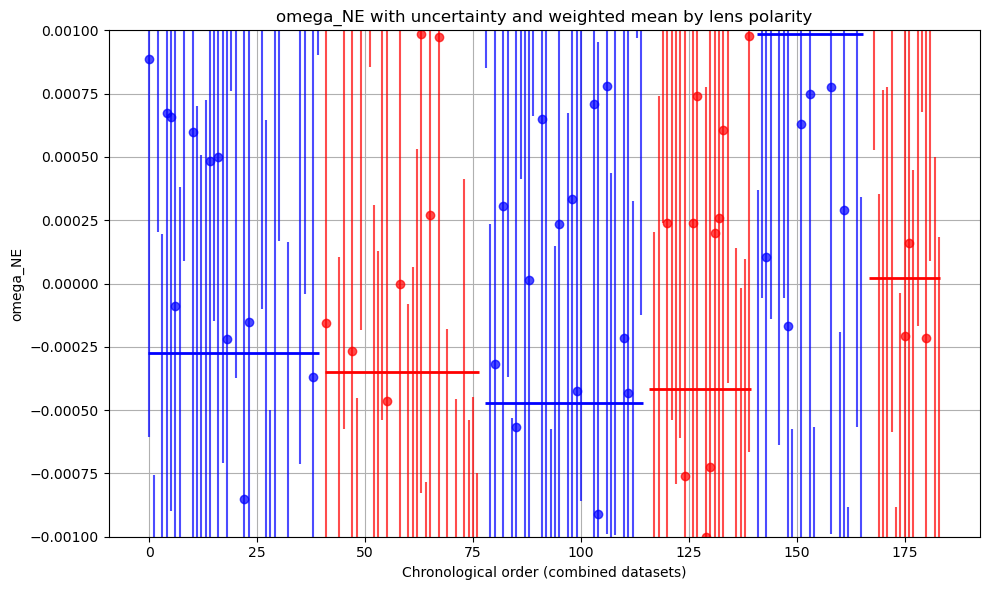

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSVs
d1 = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.1123_0015.1125_0015.1126_0015.1127_0015.1128.csv")
d2 = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.1129_0015.1130_0015.1131_0015.1132_0015.1133.csv")
d3 = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.1134_0015.1135_0015.1138_0015.1139_0015.1140_.csv")
d4 = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.1160_0015.1161_0015.1162_0015.1163_0015.1164_.csv")
d5 = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.1185_0015.1186_0015.1187_0015.1188_0015.1189_.csv")
d6 = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.1211_0015.1212_0015.1213_0015.1214_0015.1215_.csv")

# Assign lens polarity
d1["lens_polarity"] = 1
d3["lens_polarity"] = 1
d5["lens_polarity"] = 1

d2["lens_polarity"] = -1
d4["lens_polarity"] = -1
d6["lens_polarity"] = -1

# Combine all in chronological order
dfs = [d1, d2, d3, d4, d5, d6]
df_all = pd.concat(dfs, ignore_index=True)

# Prepare plotting
fig, ax = plt.subplots(figsize=(10, 6))
start_idx = 0

# Plot each block with error bars and weighted mean
for d in dfs:
    n = len(d)
    x = np.arange(start_idx, start_idx + n)
    color = 'blue' if d["lens_polarity"].iloc[0] == 1 else 'red'

    # Errorbar plot
    ax.errorbar(x, d["omega_NE"], yerr=d["uncertainty_omega_NE"], fmt='o', color=color, ecolor=color, alpha=0.7)

    # Weighted mean (inverse variance)
    weights = 1 / d["uncertainty_omega_NE"]**2
    weighted_mean = np.sum(d["omega_NE"] * weights) / np.sum(weights)

    # Horizontal line at weighted mean
    ax.hlines(weighted_mean, x.min() - 0.3, x.max() + 0.3, colors=color, linestyles='-', linewidth=2)

    start_idx += n + 1  # add gap between blocks

# Labels and style
ax.set_xlabel("Chronological order (combined datasets)")
ax.set_ylabel("omega_NE")
ax.set_title("omega_NE with uncertainty and weighted mean by lens polarity")
ax.set_ylim(-0.001,0.001)
ax.grid(True)
plt.tight_layout()
plt.show()


In [7]:
(df_all["omega_NE"]*df_all["uncertainty_omega_NE"]**(-2)).sum()/ (df_all["uncertainty_omega_NE"]**(-2)).sum()

-0.00011317734827222981

In [8]:
np.sqrt(1/(df_all["uncertainty_omega_NE"]**(-2)).sum())

0.00014105269130731455

In [9]:
# reduced chi squared
chi_squared = np.sum(((df_all["omega_NE"] - 
                        (df_all["omega_NE"]*df_all["uncertainty_omega_NE"]**(-2)).sum()/ (df_all["uncertainty_omega_NE"]**(-2)).sum())**2) / 
                        df_all["uncertainty_omega_NE"]**2)

In [10]:
red_chi_squared = chi_squared / (len(df_all) - 1)
red_chi_squared

2.1844095506171524